## LAB 1

## Data Loading

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
#IMPORTING DATASET
pd.set_option('display.max_columns',None)
ds = pd.read_csv(r"C:\Users\gunja\Downloads\kc_house_data.csv\kc_house_data.csv")
ds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#DATASET HAVE 21613 ROWS AND 21 FEATURES
ds.shape

(21613, 21)

In [4]:
#REMOVING UNNECESSARY FEATURES
ds.drop(['id','date'],axis = 1,inplace = True)
ds.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#CHECKING FOR NULL VALUES
ds.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**NO MISSING DATA**

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [7]:
ds.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Exploratory Data Analysis (EDA)

<Axes: title={'center': 'Correlation Matrix'}>

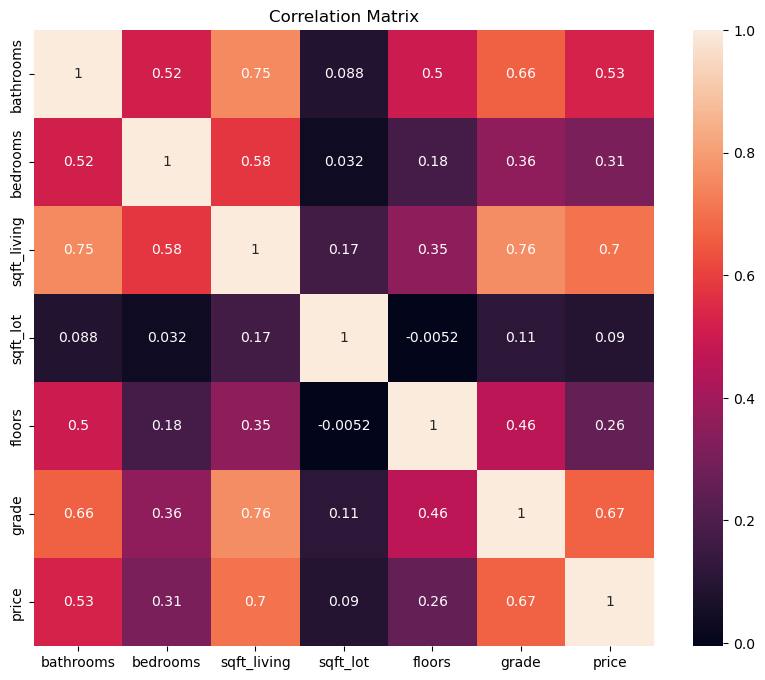

In [8]:
corr = ds[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix')
sns.heatmap(corr.corr(),annot=True)

In [10]:
#DIVIDING DATASET IN DEPENDENT AND INDEPENDENT VARIABLE
x = ds.iloc[:,1:].values
y = ds.iloc[:,0].values

In [11]:
#SPLITTING DATASET IN TRAINING AND TESTING SET
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

## Data Building ANN 

Artificial Neural Network 

In [12]:
#FEATURE SCALING IS NECESSARY IN ANN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann = tf.keras.models.Sequential()

In [14]:
#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))

In [15]:
#ADDING 2ND HIDDEN LAYER WITH 30 NEURONS
ann.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))

In [16]:
#ADDING 3RD HIDDEN LAYER WITH 30 NEURONS
ann.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))

In [17]:
#ADDING 4TH HIDDEN LAYER WITH 30 NEURONS
ann.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))

In [18]:
#ADDING OUTPUT LAYER WITH 1 NEURON .
ann.add(tf.keras.layers.Dense(units = 1))

In [19]:
#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [22]:
#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
ann.fit(x_train,y_train,batch_size = 20,epochs = 10)

Epoch 1/10
865/865 [==============================] - 2s 2ms/step - loss: 28181483520.0000
Epoch 2/10
865/865 [==============================] - 2s 2ms/step - loss: 27948705792.0000
Epoch 3/10
865/865 [==============================] - 2s 2ms/step - loss: 27860703232.0000
Epoch 4/10
865/865 [==============================] - 2s 2ms/step - loss: 27709544448.0000
Epoch 5/10
865/865 [==============================] - 2s 2ms/step - loss: 27524478976.0000
Epoch 6/10
865/865 [==============================] - 2s 2ms/step - loss: 27417587712.0000
Epoch 7/10
865/865 [==============================] - 2s 2ms/step - loss: 27318714368.0000
Epoch 8/10
865/865 [==============================] - 2s 3ms/step - loss: 27204894720.0000
Epoch 9/10
865/865 [==============================] - 2s 2ms/step - loss: 27036809216.0000
Epoch 10/10
865/865 [==============================] - 2s 2ms/step - loss: 26806362112.0000


In [23]:
#COMPARING ACTUAL VALUES WITH PREDICTED VALUES
np.set_printoptions(precision=2)
y_pred = ann.predict(x_test)
np.concatenate((y_pred,y_test.reshape(-1,1)),1)

136/136 [==============================] - 0s 2ms/step


array([[ 386418.97,  297000.  ],
       [1754296.75, 1578000.  ],
       [ 568966.25,  562100.  ],
       ...,
       [ 356514.91,  369950.  ],
       [ 267534.94,  300000.  ],
       [ 409139.19,  575950.  ]])

## Accuracy and evaluation

In [24]:
#GETTING ACCURACY
from sklearn.metrics import r2_score
y_pred = ann.predict(x_test)
print(r2_score(y_test,y_pred))

136/136 [==============================] - 0s 2ms/step
0.792683592857768


**I GOT AN ACCURACY OF AROUND 79% TUNING THE HYPERPARAMETERS MAY INCREASE THE ACCURACY**